<a href="https://colab.research.google.com/github/allcorps/IA_practices/blob/main/visionn_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JNbook que utiliza un dataset de tensorflow con el fin de predecir que numero se esta ingresando

In [1]:
#imports
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging

In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
#datos de libreria mnist de tensorflow

dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [7]:
# lista de posibles respuestas

class_names = [
               'cero', 'uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve'
]

In [8]:
#variables de entrenamiento y prueba

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [9]:
#funcion de normalizacion: Numeros de 0 a 255 , que sean de 0 a 1

def normalize(images, labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images, labels
    

In [10]:
#llamar a la funcion de normalizacion en cada dato del set de datos

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)   

In [11]:
#definir estructura de la red

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu), #relu para capas ocultas
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax) #softmax es para la capa de clasificacion
])

#compilar modelo con una funcion basica de costo

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
#aprendizaje por lotes de 32 cada lote

BATCHSIZE = 32

train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

In [13]:
#entrenamiento

model.fit(
    train_dataset, epochs=5,
    steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE)
)

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2604 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1186 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0568 - accuracy: 0.9819


In [14]:
#evaluacion de modelo con el dataset_test

test_loss, test_accuracy = model.evaluate(
    test_dataset, steps=math.ceil(num_test_examples/32) 
)

print("Resultados: ", test_accuracy)


313/313 [==============================] - 1s 4ms/step - loss: 0.0971 - accuracy: 0.9688
Resultados:  0.9688000082969666


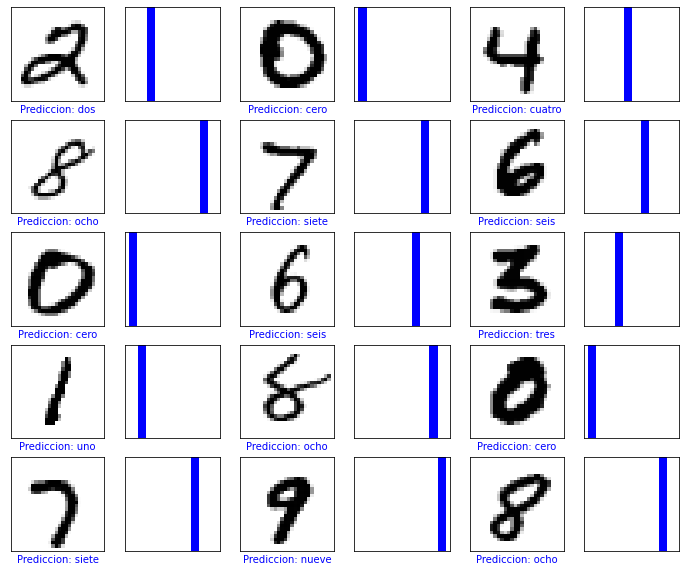

In [16]:
# ver resutlados de forma grafica


for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)
 
def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()